# Project: Wrangle and Analyze Data
### By Temitope Adebiyi

### Gathering data for the project


In [23]:
#import python libraries for the project
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import matplotlib.pyplot as plt

#Twitter api keys and token and secert
consumer_key = '------'
consumer_secret = '------'
access_token = '------'
access_secret = '------'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [24]:
#reading the first data set manually
df_1 = pd.read_csv('twitter-archive-enhanced-2.csv')

In [12]:
#previewing the first data frame
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#showing the total tweet ids in the Data frame
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [6]:
# querying the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt
count = 0
fails_dict = {}
start = timer()

with open('tweet_json2.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


KeyboardInterrupt: 

In [ ]:
#download programmatically using the Requests library for the image prediction file
import requests
import os
folder_name = 'image_predictions.tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [ ]:

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode ='wb') as file:
    file.write(response.content)

In [25]:
#reading the image prediction data frame with pandas
df_2 = pd.read_table('image_predictions.tsv/image-predictions.tsv', sep='\t')

In [6]:
#previewing the image prediction data frame
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
#reading the tweet json txt file with pandas 
df_3 = pd.read_json('tweet-json.txt', lines=True)
df_3 = df_3[['id', 'retweet_count', 'favorite_count']]


### Assessing Data

In [7]:
#showing the information of the data frame
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


In [8]:
#showing the number of duplicated tweet id
df_3['id'].duplicated().sum()

0

In [9]:
#showing the information of the data frame
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
#showing the number of duplicated tweet id
df_2['tweet_id'].duplicated().sum()

0

In [11]:
#showing the number of duplicated image link
df_2['jpg_url'].duplicated().sum()

66

In [12]:
#showing the information of the data frame
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#showing the name column of the data frame
df_1['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [14]:
#Checking for the number of duplicated tweet id
df_1['tweet_id'].duplicated().sum()

0

In [15]:
#checking the rating numerator value count
df_1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
#checking the rating denominator value count
df_1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [58]:
#checking dogs that have multiple stage
df_1.loc[(df_1[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


### Quality issues

- Rows with retweets which is not needed for the project will be dropped. 
- Drop irrelevant columns and columns that have incomplete values
- There is issues with the rating denominator there are value not equals to 10
- In the image prediction column of p1,p2,p3 there are _ in the values instead of space.
- In the image prediction data frame there should be one column for the best prediction and another column for the best confidence level.
- Rating numerator column has enormous values which should be dropped
- The timestamp column should be converted to datetime data type.
- the dog name column has some incorrect values like none, a, an, the, etc which are not actuall names.
- There are dogs that have multiple dog stages

### Tidiness issues
- The dog name should be in one column and the various stages of dog should be in a single column.
- The three data frame should be merge together to form a single data frame.
- Delete the old prediction columns after the getting the most correct prediction.

## Cleaning the data
### Quality

In [59]:
#creating copy of the dataframe for cleaning
df_twitter_archive = df_1.copy()
df_image_prediction = df_2.copy()
df_twitter_api = df_3.copy()

### Quality issue 1
- Dropping the retweet rows in order to get only tweeted rows.

### Code

In [60]:
#dropping the retweeted column
df_twitter_archive = df_twitter_archive[pd.isnull(df_twitter_archive['retweeted_status_user_id'])]


### Test

In [61]:
#testing for retweeted column
df_twitter_archive['retweeted_status_id'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: retweeted_status_id, dtype: float64

### Quality issue 2
- Dropping irrelevant columns and columns with incomplete data in all data set.

### Code

In [62]:
#Dropping irrelevant columns and columns with incomplete data in all data set.
column = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id', 'expanded_urls']
df_twitter_archive.drop(column, axis=1, inplace=True)


### Test

In [63]:
#checking the lists of columns
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Quality issue 3
- There is issues with the rating denominator there are value not equals to 10, am going to make all denominator 10.

### Code

In [64]:
#extracting values containing all rating numerators with decimals and rating denominators (without decimals)
ratings = df_twitter_archive.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df_twitter_archive['rating_numerator'] = ratings[0].astype('float')
df_twitter_archive['rating_denominator'] = ratings[1].astype('float')

In [65]:
#converting all denominator to 10
df_twitter_archive.rating_denominator[df_twitter_archive.rating_denominator > 10] = 10
df_twitter_archive.rating_denominator[df_twitter_archive.rating_denominator < 10] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Test

In [66]:
#checking if all denominator is 10
df_twitter_archive['rating_denominator'].value_counts()

10.0    2175
Name: rating_denominator, dtype: int64

### Quality issue 4
- In the image prediction column of p1,p2,p3 there are _ in the values instead of space.

### Code

In [67]:
# changing all _ in column of p1,p2,p3 to space.
df_image_prediction['p1'] = df_image_prediction['p1'].str.replace('_', ' ')
df_image_prediction['p2'] = df_image_prediction['p1'].str.replace('_', ' ')
df_image_prediction['p3'] = df_image_prediction['p3'].str.replace('_', ' ')

### Test

In [68]:
#checking if _ has changed to " "
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Welsh springer spaniel,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,redbone,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,German shepherd,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Rhodesian ridgeback,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,miniature pinscher,0.243682,True,Doberman,0.154629,True


### Quality issue 5
- There are three different prediction with some having three differnet value annd some having a wrong value.

### Code

In [69]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_classification = []
prediction = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def picture(df_image_prediction):
    if df_image_prediction['p1_dog'] == True:
        dog_classification.append(df_image_prediction['p1'])
        prediction.append(df_image_prediction['p1_conf'])
    elif df_image_prediction['p2_dog'] == True:
        dog_classification.append(df_image_prediction['p2'])
        prediction.append(df_image_prediction['p2_conf'])
    elif df_image_prediction['p3_dog'] == True:
        dog_classification.append(df_image_prediction['p3'])
        prediction.append(df_image_prediction['p3_conf'])
    else:
        dog_classification.append('Fail')
        prediction.append('0')

#series objects having index the df_image_prediction column.        
df_image_prediction.apply(picture, axis=1)

#create new columns
df_image_prediction['dog_classification'] = dog_classification
df_image_prediction['prediction'] = prediction

### Test

In [70]:
#checking for the new column which was added
df_image_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_classification,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Welsh springer spaniel,0.156665,True,Shetland sheepdog,0.061428,True,Welsh springer spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,redbone,0.074192,True,Rhodesian ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,German shepherd,0.138584,True,bloodhound,0.116197,True,German shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Rhodesian ridgeback,0.360687,True,miniature pinscher,0.222752,True,Rhodesian ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,miniature pinscher,0.243682,True,Doberman,0.154629,True,miniature pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,Bernese mountain dog,0.263788,True,Greater Swiss Mountain dog,0.016199,True,Bernese mountain dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,box turtle,0.045885,False,terrapin,0.017885,False,Fail,0
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,chow,0.058279,True,fur coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping cart,0.014594,False,golden retriever,0.007959,True,golden retriever,0.00795896
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,miniature poodle,0.192305,True,soft-coated wheaten terrier,0.082086,True,miniature poodle,0.201493


### Quality issue 6
- Rating numerator column has enormous values which should be dropped, values greater than 20.

### Code

In [71]:
#removing all enormous values of numerator greater than 20
df_twitter_archive = df_twitter_archive[df_twitter_archive.rating_numerator < 20]


### Test

In [72]:
#counting the new value count for the numerator
df_twitter_archive.rating_numerator.value_counts()

12.00    500
10.00    442
11.00    426
13.00    307
9.00     156
8.00      98
7.00      54
14.00     43
5.00      34
6.00      32
3.00      19
4.00      17
2.00       9
1.00       8
0.00       2
11.27      1
15.00      1
9.50       1
17.00      1
13.50      1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

### Quality issue 7
- correcting all the data type for all dataframe eg the timestamp to datetime

In [73]:
#correcting all the data type for all dataframe eg the timestamp to datetime
import datetime
df_twitter_archive['timestamp'] = pd.to_datetime(df_twitter_archive['timestamp'])


In [74]:
#checking the new data type for the timestamp column
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2154 non-null int64
timestamp             2154 non-null datetime64[ns]
source                2154 non-null object
text                  2154 non-null object
rating_numerator      2154 non-null float64
rating_denominator    2154 non-null float64
name                  2154 non-null object
doggo                 2154 non-null object
floofer               2154 non-null object
pupper                2154 non-null object
puppo                 2154 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 201.9+ KB


### Quality issue 8
- the dog name column has some incorrect values like none, a, an, the, etc which are not actuall names. 
- I will extract the dog names into a new column and compare the other name column. 

### Code

In [75]:
#removing incorrect dog name from the name column
wrong_name = ['the','old','all','this','very','life','an','a','by','my','O','quite','such','actually','just', 'getting','mad','not','one']

df_twitter_archive.replace(wrong_name, 'NIL', inplace=True)

### Test

In [76]:
#checking for the changes in the name column
df_twitter_archive[df_twitter_archive.name == 'NIL']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,14.0,10.0,NIL,None,None,None,None
56,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,14.0,10.0,NIL,None,None,pupper,None
169,859196978902773760,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,12.0,10.0,NIL,None,None,None,None
193,855459453768019968,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",12.0,10.0,NIL,None,None,None,None
335,832645525019123713,2017-02-17 17:38:57,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,10.0,10.0,NIL,None,None,None,None
369,828650029636317184,2017-02-06 17:02:17,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",14.0,10.0,NIL,None,None,None,None
649,792913359805018113,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,13.0,10.0,NIL,None,None,None,None
775,776201521193218049,2016-09-14 23:30:38,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,10.0,10.0,NIL,None,None,None,None
801,772581559778025472,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,10.0,10.0,NIL,None,None,None,None
819,770655142660169732,2016-08-30 16:11:18,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,11.0,10.0,NIL,None,None,None,None


### Quality issue 9
- There are dogs that have multiple dog stages which will be dropped

### Code

In [99]:
#dropping the specific tweet id with multiple dog stages
row = [855851453814013952,854010172552949760,817777686764523521,808106460588765185,802265048156610565,801115127852503040,785639753186217984,781308096455073793,775898661951791106,770093767776997377,759793422261743616,751583847268179968,741067306818797568,733109485275860992]
for i in row:
    df_twitter_archive = df_twitter_archive[df_twitter_archive.tweet_id != i]


### Test

In [100]:
df_twitter_archive.loc[(df_twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Cleaning the data
### Tidiness


### Tidiness Issue 1
- The dog name should be in one column and the various stages of dog should be in a single column.

### Code

In [101]:
#converting the three dog stage columns into one single column for just the dog stage
df_twitter_archive_melted = pd.melt(df_twitter_archive, id_vars=['tweet_id','timestamp','source','text',
                                                           'rating_numerator','rating_denominator','name'], var_name = "Value", value_name = "Stage")

In [102]:
#checking value count for the new column created
df_twitter_archive_melted.Value.value_counts()

pupper     2142
puppo      2142
doggo      2142
floofer    2142
Name: Value, dtype: int64

In [103]:
#checking value count for the new column created
df_twitter_archive_melted.Stage.value_counts()

None       8236
pupper      224
doggo        75
puppo        24
floofer       9
Name: Stage, dtype: int64

In [104]:
#dropping the value column
df_twitter_archive_melted = df_twitter_archive_melted.drop('Value', 1)

In [105]:
#dropping duplicated row which have occurredafter melting
df_twitter_archive_melted = df_twitter_archive_melted.sort_values('Stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

### Test

In [106]:
#checking data frame for non null values for each column
df_twitter_archive_melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 2056 to 6968
Data columns (total 8 columns):
tweet_id              2142 non-null int64
timestamp             2142 non-null datetime64[ns]
source                2142 non-null object
text                  2142 non-null object
rating_numerator      2142 non-null float64
rating_denominator    2142 non-null float64
name                  2142 non-null object
Stage                 2142 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 150.6+ KB


In [107]:
#value count for the new dog stage column
df_twitter_archive_melted.Stage.value_counts()

None       1810
pupper      224
doggo        75
puppo        24
floofer       9
Name: Stage, dtype: int64

### Tidiness issue 2
- Delete the old prediction columns after the getting the most correct prediction.


### Code

In [108]:
#checking the image prediction data frame information
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id              2075 non-null int64
jpg_url               2075 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null bool
dog_classification    2075 non-null object
prediction            2075 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 184.5+ KB


In [109]:
#dropping unnessary column of the image prediction data frame
dropping_prediction = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
df_image_prediction = df_image_prediction.drop(dropping_prediction,1)

### Test

In [110]:
#checking if the columns were dropped
df_image_prediction.head()

,tweet_id,jpg_url,img_num,dog_classification,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311


### Tidiness issue 3
- The three data frame should be merge together to form a single data frame.

### Code

In [111]:
df_twitter_archive_melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 2056 to 6968
Data columns (total 8 columns):
tweet_id              2142 non-null int64
timestamp             2142 non-null datetime64[ns]
source                2142 non-null object
text                  2142 non-null object
rating_numerator      2142 non-null float64
rating_denominator    2142 non-null float64
name                  2142 non-null object
Stage                 2142 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 150.6+ KB


In [112]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id              2075 non-null int64
jpg_url               2075 non-null object
img_num               2075 non-null int64
dog_classification    2075 non-null object
prediction            2075 non-null object
dtypes: int64(2), object(3)
memory usage: 81.1+ KB


In [113]:
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


In [114]:
#rename the id column to tweet_id
df_twitter_api = df_twitter_api.rename(columns={'id':'tweet_id'})


In [115]:
#merging all the data frame to create the master data frame 
df_twitter_merged = pd.merge(df_twitter_api, df_twitter_archive_melted, on = 'tweet_id', how='inner')
df_twitter_merged = pd.merge(df_twitter_merged, df_image_prediction, on='tweet_id', how='inner')

In [116]:
#information on the merged data frame
df_twitter_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 14 columns):
tweet_id              1967 non-null int64
retweet_count         1967 non-null int64
favorite_count        1967 non-null int64
timestamp             1967 non-null datetime64[ns]
source                1967 non-null object
text                  1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null float64
name                  1967 non-null object
Stage                 1967 non-null object
jpg_url               1967 non-null object
img_num               1967 non-null int64
dog_classification    1967 non-null object
prediction            1967 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 230.5+ KB


### Storing, Analyzing, and Visualizing Data for this Project
- Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

- Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

### Storing

In [117]:
#storing the cleaned data frames
import os
folder_name = 'Cleaned_data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
df_twitter_merged.to_csv('Cleaned_data/twitter_archive_master.csv')
df_image_prediction.to_csv('Cleaned_data/twitter_prediction_master.csv')
df_twitter_api.to_csv('Cleaned_data/twitter_api_master.csv')
df_twitter_archive_melted.to_csv('Cleaned_data/twitter_archive_melted_master.csv')

### Analyzing and Visualizing the cleaned data

In [118]:
#The most show cased dog stage
Popular_dog_stage = df_twitter_merged[df_twitter_merged.Stage != 'None']
Popular_dog_stage['Stage'].value_counts()

pupper     203
doggo       63
puppo       22
floofer      7
Name: Stage, dtype: int64

> In the dog stage column there more rows which didn’t have any stage, but after filtering, I was able to deduce that pupper was the most showed cased dog stage with a count of 203 followed by doggo with a count of 63 followed by puppo with a count of 22 the last is the floofer with 7 counts

In [119]:
#What dog stage had the highest average rating
Popular_dog_stage.groupby('Stage')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
Stage,,,,,,,,
doggo,63.0,11.888889,1.471351,8.0,11.00,12.0,13.0,14.0
floofer,7.0,12.000000,1.154701,10.0,11.50,12.0,13.0,13.0
pupper,203.0,10.636798,1.728179,3.0,10.00,11.0,12.0,14.0
puppo,22.0,12.000000,1.309307,9.0,11.25,12.0,13.0,14.0


> I grouped the data frame by the dog stage and found the statistics of the rating of each dog stage which appeared to show that puppo and floofer has the highest average rating, then the dog stage with the least average rating is the pupper.

In [120]:
#The dog names which had the most favorite count
df_twitter_merged[['favorite_count', 'name']].sort_values(['favorite_count'],ascending=False)[10::-1]

,favorite_count,name
263,73397,Lilly
796,75163,None
135,75193,NIL
396,75639,None
93,85011,Zoey
330,95450,Bo
108,106827,Jamesy
394,107015,Stephan
58,107956,Duddles
762,131075,None


>  Well Duddles had the most favorite counts of 107956, in second place we have Stephan who has 107015 counts and in third place Jamesy with 106827 favorite counts.

In [121]:
#The dog names which had the most retweet count
df_twitter_merged[['retweet_count', 'name']].sort_values(['retweet_count'],ascending=False)[10::-1]

,retweet_count,name
336,31314,Buddy
1457,31989,Kenneth
108,32883,Jamesy
628,33421,None
396,37911,None
330,42228,Bo
58,45849,Duddles
307,48265,None
796,52360,None
394,56625,Stephan


> Stephan has the highest retweet and also was second with the highest favorite count, Duddles is second most retweeted dog and the most favorite dog. 

Text(0.5,0,'dog class')

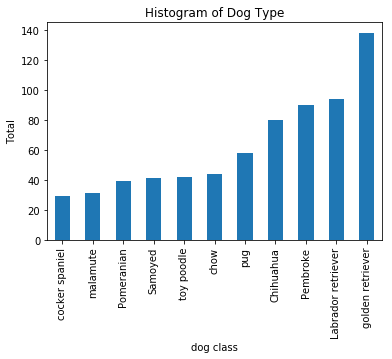

In [122]:
#Top dogs classes histogram
dog_classes = df_twitter_merged[df_twitter_merged.dog_classification != 'Fail']
dog_classes.dog_classification.value_counts()[10::-1].plot(kind = 'bar')
plt.title('Histogram of Dog Type')
plt.ylabel('Total')
plt.xlabel('dog class')

>  The highest dog classes were shown in the visualization, the most common dog class in the tweet was the golden retriever with over 130 count. The visualization shows the top 10 classes of dog in ascending order.